# **lithomap tutorial**

In [4]:
import matplotlib

## Elements

The basic building nblock is an Element which can contain various shapes.

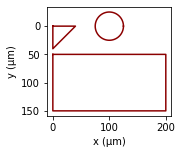

In [5]:
from lithomap import *
import numpy as np
e = Element(name='shapes',layer='MASK')
e.addrect(x0=0,y0=50,dx=200,dy=100)
e.addcircle(x0=100,y0=0,r=25)
polygon = [(0,0),(40,0),(0,40),(0,0)]
e.addpoly(polygon)
e.plot();

Various operations are available such a translating and scaling. Note that methods can be chained.

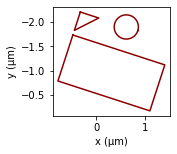

In [6]:
e.translate(-100,-200).scale(0.01).rotate(np.pi/10)
e.plot();

Elements can also contain Notes, which are the building blocks for creating annotated wafer maps and chip maps.

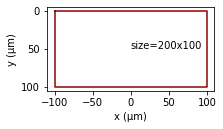

In [7]:
ee = Element(name='shapes',layer='MASK')
ee.addcenteredrect(x0=0,y0=50,dx=200,dy=100)
ee.addnote(x=0,y=50,size='200x100')
ee.plot();

Elements can have subelements, all of which are typically belong to a single parent mask element.

Dec99mask maskname:Dec99mask,text: Hi
	►glasses 
		►L 
		►R 
	►text 


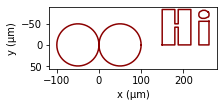

In [8]:
mask0 = Element(name='Dec99mask',layer='MASK')
eyeglasses = Element(parent=mask0,name='glasses')
eyeL = Element(parent=eyeglasses,name='L').addcircle(x0=-50,y0=0,r=50)
eyeR = Element(parent=eyeglasses,name='R').addcircle(x0=+50,y0=0,r=50)
mask0.addtext('Hi',x=150,y=0)
print(mask0)
mask0.plot();

## Building a chip

A chip is an element that has an extra feature to keep track of chip number

In [9]:
mask1 = Element(name='mask1',layer='MASK')
a = Chip(parent=mask1)
b = Chip(parent=mask1)
print(a.info.chipid)
print(b.info.chipid)
print(mask1.info.chipcount)

01A
02A
2
